#Visão geral das taxas de suicídio 1985 a 2016

**Integrantes:**


* Ana Paula Cardoso de Castro Kendall
* Francelino Teotonio Júnior
* Vivianny Khatly Medeiros Pereira


**Introdução**


Nesse projeto foi usado a dataset do site (https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016) que consta a taxa de suicídio em muitos países que tem sido bastante alta por muitos anos, incluindo os países em desenvolvimento e desenvolvidos. Veremos a taxa de suicídio do sexo, e depois a idade e a geração em 31 anos (1985 - 2016)

**Dados Usados**



*  Para os dados usados foi requerido o dataset do site kaggle

Os dados utilizados foram de um dataset chamado "master" que foi um estudo para a prevenção do suicidio e foi construído para encontrar sinais correlacionados ao aumento das taxas de suicídio entre diferentes coortes globalmente, em todo o espectro socioeconômico.


#Variáveis

country - país

year - ano

sex - sexo

age - idade

suicides_no - suicidios

population - população

suicides/100k pop -suicidios dividido por população

country-year - país ano

HDI for year - IDH por ano(indice de desonvolvimento humano)

gdp_for_year - PIB Produto Interno Bruto por ano 

gdp_per_capita - O Produto Interno Bruto - PIB per capita de cada município foi estimado pelo quociente entre o valor do PIB do municípioe sua população residente.

generation - geração

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

df = pd.read_csv("master.csv")
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Qual a taxa de suicidio de homem e mulher por ano? entre 1985 a 2016.

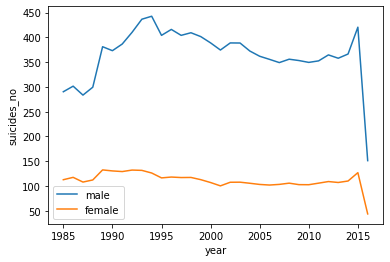

In [9]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

O suicídio por 100 mil habitantes para homens é maior que para mulheres?

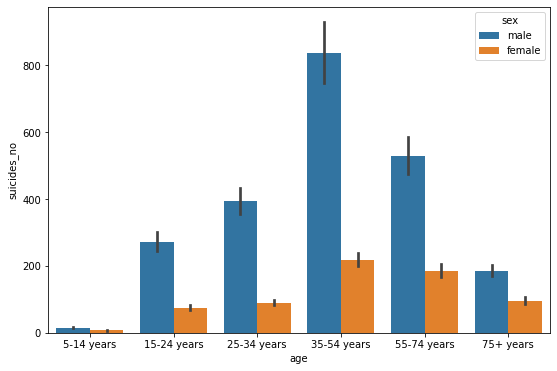

In [10]:
plt.figure(figsize=(9,6))
sns.barplot(df.age, df.suicides_no, hue=df.sex,order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])


Não importa em que ano seja, o número de suicídios do sexo masculino é cerca de três vezes maior do que o do feminino. Como sobre a idade?

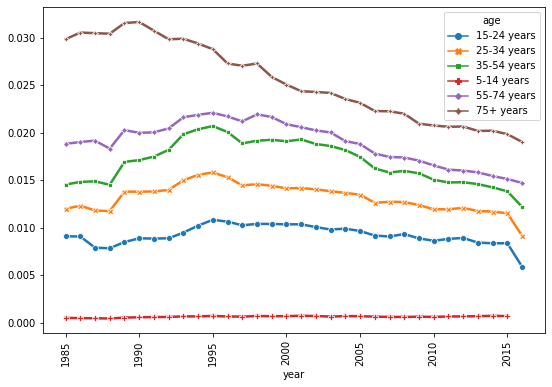

In [11]:
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()


Obviamente, a taxa de suicídio está aumentando quando a idade é maior. Ou seja, a idade é um fator de suicídio.

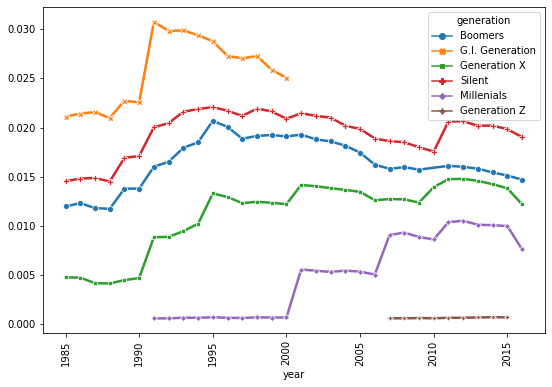

In [12]:
df_generation = df.groupby(["year", "generation"])["suicides_no", "population"].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_generation_reset.suicides_no*100/df_generation_reset.population, hue = "generation", 
            data = df_generation_reset, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

**Medidas de centralidade e dispersão das variaveis e boxplot**

 Para as explorações inicial vamos calcular as medidas de centralidade e dispersão e plotar os boxplot


Criamos uma função para facilitar fazer a medida de centralidade e dispersão para colunas numericas.

In [13]:
def df_t (a):
    print("Medidas de Centralidade e Dispersão para ",a)
    print("media: ",df[a].mean())
    print("desvio padrão: ",df[a].std())
    print("mediana: ",df[a].median())
    print("variancia: ",df[a].var())
    print("moda:\n",df[a].mode())
    print("boxplot para ",a)
    df.boxplot(column=a)

Medidas de Centralidade e Dispersão para  year
media:  2001.2583752695903
desvio padrão:  8.46905502444141
mediana:  2002.0
variancia:  71.72489300701628
moda:
 0    2009
dtype: int64
boxplot para  year


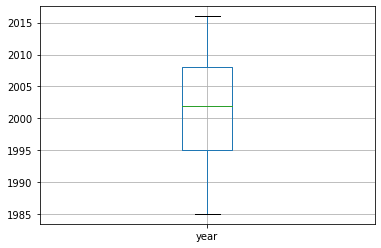

In [14]:
df_t("year")

Medidas de Centralidade e Dispersão para  suicides_no
media:  242.57440690150972
desvio padrão:  902.0479168336403
mediana:  25.0
variancia:  813690.4442639101
moda:
 0    0
dtype: int64
boxplot para  suicides_no


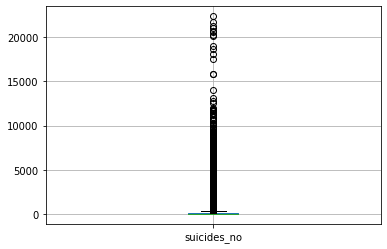

In [15]:
df_t("suicides_no")

Medidas de Centralidade e Dispersão para  population
media:  1844793.6173975556
desvio padrão:  3911779.441756363
mediana:  430150.0
variancia:  15302018400947.725
moda:
 0    24000
dtype: int64
boxplot para  population


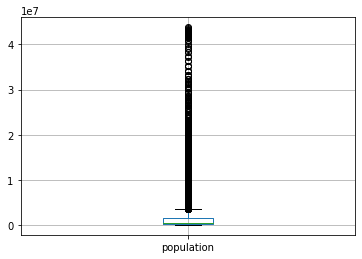

In [16]:
df_t("population")

Medidas de Centralidade e Dispersão para  suicides/100k pop
media:  12.816097411933864
desvio padrão:  18.961511014503195
mediana:  5.99
variancia:  359.538899953126
moda:
 0    0.0
dtype: float64
boxplot para  suicides/100k pop


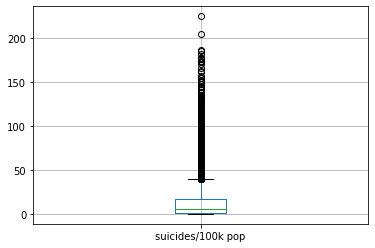

In [17]:
df_t("suicides/100k pop")

Medidas de Centralidade e Dispersão para  HDI for year
media:  0.7766011477761837
desvio padrão:  0.09336670859029964
mediana:  0.779
variancia:  0.008717342272985932
moda:
 0    0.713
1    0.772
2    0.888
dtype: float64
boxplot para  HDI for year


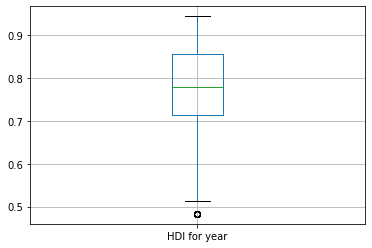

In [18]:
df_t("HDI for year")

Medidas de Centralidade e Dispersão para  gdp_per_capita ($)
media:  16866.464414090584
desvio padrão:  18887.576472205572
mediana:  9372.0
variancia:  356740544.99341345
moda:
 0    1299
1    2303
2    4104
dtype: int64
boxplot para  gdp_per_capita ($)


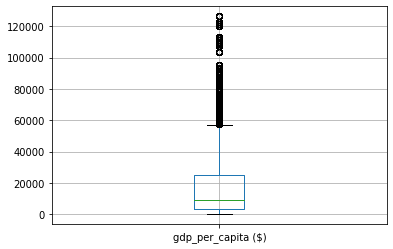

In [19]:
df_t("gdp_per_capita ($)")

**Limpeza e transformação dos dados necessários**


Para inicio do tratamento foi necessario limpar todos os NAN e linhas que continham nulo no dataset, para fluir melhor e evitar problema quando for mexer nas colunas

In [20]:
df = df.dropna()

Observamos que os boxplots estavam muito poluidos e com muitos outliers a serem visualizados, então como tratamento usamos log nas colunas.

In [ ]:
df["suicides_no"] = np.log(df["suicides_no"])
df["population"] = np.log(df["population"])
df["suicides/100k pop"] = np.log(df["suicides/100k pop"])
df["gdp_per_capita ($)"] = np.log(df["gdp_per_capita ($)"])

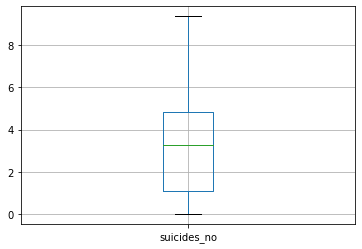

In [22]:
df.boxplot(column="suicides_no")

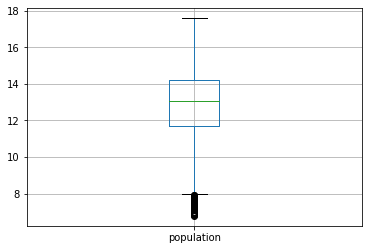

In [23]:
df.boxplot(column="population")

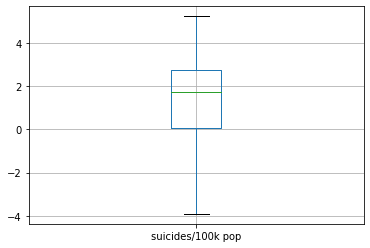

In [24]:
df.boxplot(column="suicides/100k pop")

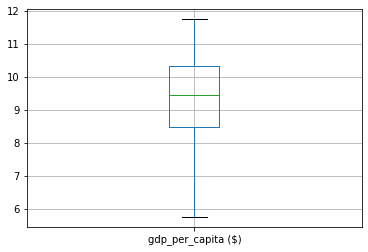

In [25]:
df.boxplot(column="gdp_per_capita ($)")

#**Conclusão**

Em geral, a taxa de suicídio está relacionada a vários fatores. Como vimos  suicidios por parte de homems é mair que por mulheres. A idade. De acordo com a taxa de suicídio de cada nível de idade, a taxa de idosos é maior, por isso os jovens devem se preocupar mais com os idosos. Além disso, o bem-estar rural dos idosos também pode impactar a taxa.

A pressão social. Uma sociedade saudável pode fazer com que os cidadãos se sintam seguros e satisfeitos, então como aliviar a pressão social se torna um tema importante para todos os países. Nosso propósito não é apenas reduzir a taxa de suicídio, mas também construir um mundo melhor.